# <b> Big Data Analysis for Cyber Security: Time-Series Analysis mini project </b>
<hr>


### <i> This project's main goal is to train a classifier who can detect malicious files.<br>                                        We detected patterns of clean files versus malicious files in our dataset using time series analysis and pattern extraction methods, and trained a classifier accordingly using machine learning. 
### <i> The dataset we based our work on has been provided us by Microsoft and includes information about downloaded files sent as a webmail attachment in the first 14 days of 2017.
### <i> The project in wiritten in Python, using pandas library for data analysis and sklearn library for machine learning algorithms.
<hr>


## Step One - Preliminary analysis of the data
We divided the dataset into two groups, train- the first 11 days of the dataset, and test-the remaining 3 days of the dataset.
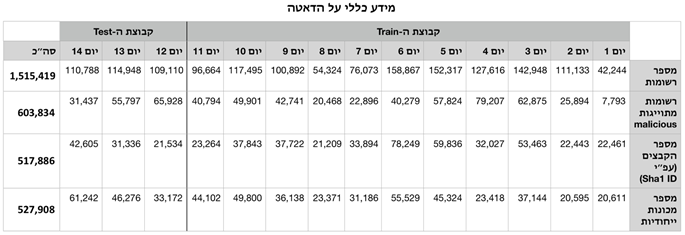

First, we set a threshold for files - a file will be removed if it had 5 or less downloads on different machines. 

This means that a file is defined as clean if it is not tagged as malicious during the entire test period, and also has more
than 5 downloads on different machines. 
A file is defined as malicious if it is tagged as malicious in one of its instances during the train period, and has more than 5 downloads on different machines.

Having set the threshold above, this is the data we have left which meets the definition:
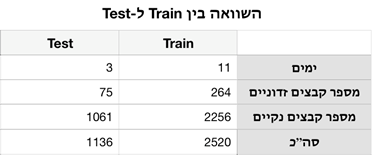



In [2]:
import pandas as pd
import os
import matplotlib.dates as md
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
#Gets "data.csv" - all data given to us
#filters it by day and by hour
# creates 'daySet.csv' 'hourSet.csv'

dateTimeObj = datetime.now()
starttimestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('START Timestamp : ', starttimestampStr)

def create_folder(dirName):
    parent_dir = os.getcwd()
    path = os.path.join(parent_dir, dirName)
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.mkdir(dirName, 0o777)
        print("Directory ", dirName, " Created ")
    else:
        print("Directory ", dirName, " already exists")
    print(path)
    return path




def create_dataset():
    allData = pd.read_csv("data.csv")[
        ["Sha1ID", "ThreatNameID", "ReportTime", "MachineGuidID", "Size"
        ]]  # keep relavent coulmns #dataframe
    files = [[]]
    # --------------------create a dataSet to each file------------------------------
    allData.sort_values(by=['Sha1ID', 'ReportTime'], ascending=[True, True], inplace=True)
    i = -1
    j = 0
    currF = allData.iloc[0][0]
    #files = [[]]
    files[j] = []
    for sha in allData["Sha1ID"]:
        if i%5000 == 0: #TODO check
            print(i)
        if sha==15201105:
            print("A")
        i = i + 1
        if currF == sha:
            files[j].append(
                [allData.iloc[i][0], allData.iloc[i][1], allData.iloc[i][2], allData.iloc[i][3], allData.iloc[i][4]])
        else:
            files[j] = pd.DataFrame(files[j], columns=["Sha1ID", "ThreatNameID", "ReportTime", "MachineGuidID", "Size"])
            currF = sha
            j = j + 1
            files.append([])
            files[j].append(
                [allData.iloc[i][0], allData.iloc[i][1], allData.iloc[i][2], allData.iloc[i][3], allData.iloc[i][4]])
    files[j] = pd.DataFrame(files[j], columns=["Sha1ID", "ThreatNameID", "ReportTime", "MachineGuidID", "Size"])
    return files

    #del allData
    #gc.collect()


def sortByMachines(files):
# ------------------remove from each dataSet file apearnces with duplicated machines and keep the earliest-----------
    i = 0
    hourSet = []
    daySet = []
    for i in range(len(files)):
        if i%5000 == 0: #TODO check
            print(i)
        if i == 423:
            print("A")
        # add label malicious
        if ((files[i].ThreatNameID.values != 5644).sum() > 0):
            files[i]['Malicious'] = True
        else:
            files[i]['Malicious'] = False
        files[i].sort_values(by=['ReportTime', 'MachineGuidID'], ascending=[True, True], inplace=True)

        # -------------------create time set to each file dataset - machine vs hours-----------------
        # ------------hourSet - hour vs machine----------------
        # files[i]['ReportTime'] = pd.to_datetime(files[i]['ReportTime']).apply(lambda x: x.replace(minute=0, second=0))
        # files[i].drop_duplicates(('MachineGuidID' ,'ReportTime'), keep="first", inplace=True)
        #
        #
        # hourSet.append(files[i].groupby([pd.Grouper(key='ReportTime', freq='H'), "Sha1ID", "Malicious", "Size"]).size().reset_index(
        #         name='HourlyMachineCount'))
        # # Clean-Prevalent file (more than X machines)
        # if (hourSet[i]['HourlyMachineCount'].sum() > 10):
        #     hourSet[i]['MoreThan10'] = True
        # else:
        #     hourSet[i]['MoreThan10'] = False


        # ------------ daySet-day vs machine-----------------
        files[i]['ReportTime'] = pd.to_datetime(files[i]['ReportTime']).apply(
lambda x: x.replace(hour=0, minute=0, second=0))
        files[i].drop_duplicates(('MachineGuidID', 'ReportTime'), keep="first", inplace=True)

        daySet.append(files[i].groupby([pd.Grouper(key='ReportTime', freq='D'), "Sha1ID", "Malicious", "Size"]).size().reset_index(
            name='DailyMachineCount'))

        # Clean-Prevalent file (more than X machines)
        if (daySet[i]['DailyMachineCount'].sum() > 10):
            daySet[i]['MoreThan10'] = True
        else:
            daySet[i]['MoreThan10'] = False

    return (daySet,hourSet,len(files))

 #-------------got from pre function ----------


files = create_dataset()
# with open('FILES.pkl', 'wb') as f:
#     pickle.dump(files, f)

(daySet,hourSet,numfiles)=sortByMachines(create_dataset())
print("dataset created")

pd.concat(daySet).to_csv('daySet.csv')
# pd.concat(hourSet).to_csv('hourSet.csv')

fileML = open("All_data_to_Hour_Day_datasets timestamp", "a+")  # append mode
fileML.write('START Timestamp : '+ starttimestampStr )
parent_dir = os.getcwd()
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print(',END Timestamp : ', timestampStr)
fileML.write('END Timestamp : '+ timestampStr)
fileML.write('\n ----------- \n')
fileML.close()

print("saved")





ModuleNotFoundError: No module named 'pandas'

For each file from the in train group we created a time series (vector representing number of downloads in a (daily / hourly time frame ) that represents the number of file downloads on different machines, ie does not include repeated downloads of a file on the same machine.
To produce time series - we started by classifying by day and by hour: we grouped the downloads for each file => We deleted double downloads on the same machine according to SH1 so that for each day / hour we left the first download that occurred on a specific machine only.

We started with a division of time ranges by hours and by days. Later we decided to continue with time series at intervals of only days (for technical reasons of code execution times).

Example for dayly time series of a file:
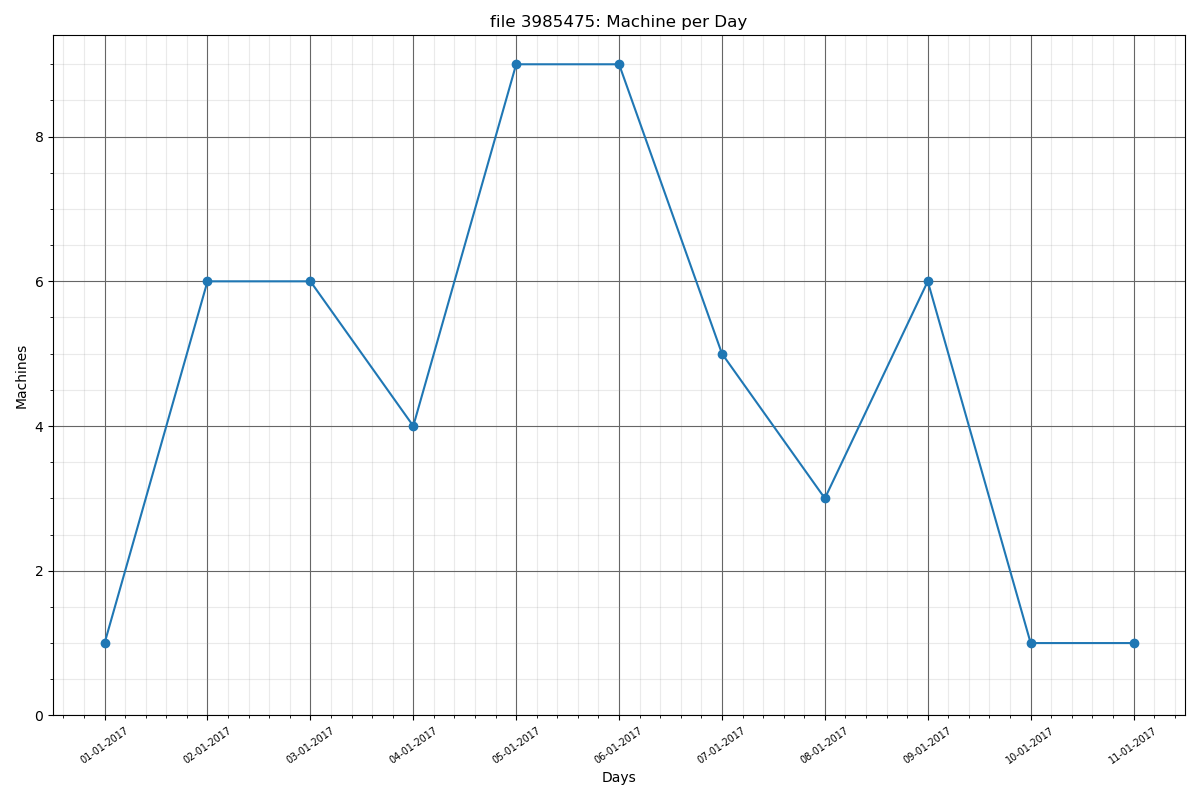

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as md
from datetime import datetime

dateTimeObj = datetime.now()
starttimestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('START Timestamp : ', starttimestampStr)

# Gets ""daySet.csv"- all files day dataset
# Returns "day Malicious" and "day Clean" folders that contain graphs and "malicious files day data.csv" , "clean files day data.csv"

def create_folder(dirName):
    parent_dir = os.getcwd()
    path = os.path.join(parent_dir, dirName)
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.mkdir(dirName, 0o777)
        print("Directory ", dirName, " Created ")
    else:
        print("Directory ", dirName, " already exists")
    print(path)
    return path

#----------create folders
#
# maliciousDayPath=create_folder("day Malicious")
# cleanDayPath=create_folder("day Clean")

daySet1 = pd.read_csv("daySet.csv",header=0)[["ReportTime", "Sha1ID", "Malicious",
                                              "DailyMachineCount", "MoreThan10", "Size"]]
i = -1
j = 0
currF = daySet1.iloc[0][1]
daySet = [[]]
daySet[j] = []
for sha in daySet1["Sha1ID"]:
    # if i > 269999:
    #     break
    if i%5000 == 0:
        print(i)
    i = i + 1
    if currF == sha:
        daySet[j].append(
            [daySet1.iloc[i][0], daySet1.iloc[i][1], daySet1.iloc[i][2], daySet1.iloc[i][3], daySet1.iloc[i][4], daySet1.iloc[i][5]]
        )
    else:
        daySet[j] = pd.DataFrame(daySet[j], columns=["ReportTime", "Sha1ID", "Malicious",
                                                     "DailyMachineCount", "MoreThan10", "Size"])
        daySet[j]['ReportTime'] = pd.to_datetime(daySet[j]['ReportTime'],dayfirst=True)
        currF = sha
        j = j + 1
        daySet.append([])
        daySet[j].append(
            [daySet1.iloc[i][0], daySet1.iloc[i][1], daySet1.iloc[i][2], daySet1.iloc[i][3], daySet1.iloc[i][4], daySet1.iloc[i][5]])

daySet[j] = pd.DataFrame(daySet[j], columns=["ReportTime", "Sha1ID", "Malicious",
                                             "DailyMachineCount", "MoreThan10", "Size"])
daySet[j]['ReportTime'] = pd.to_datetime(daySet[j]['ReportTime'], dayfirst=True)

numfiles = len(daySet)
print(numfiles)


#------get time set of all hours between 1/1 to 11/1 vs number of machines.------------
DaysDeltas = pd.Series(pd.date_range(start='-01-01-2017', end='2017-01-11', freq='D'))
DayDeltasList = [[day,0,] for day in DaysDeltas]
dayRangeVSmachine = []

#------data frames that wii contain all the data about the relevent files. in the end will export to csv.------------
malicious_files = pd.DataFrame([], columns=["Sha1ID","MoreThan10","Malicious",
                                            "Day_Array","Hour_Array","Mean","Std","Size"])
clean_files = pd.DataFrame([], columns=["Sha1ID","MoreThan10","Malicious",
                                        "Day_Array","Hour_Array","Mean","Std","Size"])

#----------create folders
# maliciousDayPath=create_folder("Day Malicious")
# cleanDayPath=create_folder("Day Clean")

for i in range(numfiles):
    if i%5000 == 0:
        print(i)

    # ------data about file i----
    fileSha=daySet[i]["Sha1ID"][0]
    MoreThan10 = daySet[i]["MoreThan10"][0]
    Malicious = daySet[i]["Malicious"][0]
    size = daySet[i]["Size"][0]
    #----ranged by day----
    dayRangeVSmachine.append(pd.DataFrame(DayDeltasList, columns=['ReportTime', 'DailyMachineCount']))
    dayRangeVSmachine[i] = daySet[i].append(dayRangeVSmachine[i], ignore_index=True)
    dayRangeVSmachine[i].drop_duplicates('ReportTime', keep="first", inplace=True)
    dayRangeVSmachine[i].sort_values(by=['ReportTime'], ascending=[True], inplace=True)
    dayRangeVSmachine[i]["Sha1ID"] = fileSha
    dayRangeVSmachine[i]["MoreThan10"] = MoreThan10
    dayRangeVSmachine[i]["Malicious"] = Malicious
    dayRangeVSmachine[i]["Size"] = size
    day_Array=dayRangeVSmachine[i]["DailyMachineCount"].to_numpy()

    # --------- statistics---------
    # Average per day
    mean = dayRangeVSmachine[i]["DailyMachineCount"].mean()
    daySet[i]['Mean'] = mean
    #print("file {}: Average machine count per day is: {:.3f}".format(fileSha, perDayAverageMachine))
    # Std
    std = dayRangeVSmachine[i]["DailyMachineCount"].std()
    daySet[i]['Std'] = std
    #print("file {}: Standard deviation is: {:.3f}".format(fileSha, fileStd))

    # --------- data line---------
    data_for_file = pd.DataFrame([[fileSha,MoreThan10,Malicious,day_Array,mean,std,size]],
                                 columns=["Sha1ID","MoreThan10","Malicious","Day_Array","Mean","Std","Size"])


#-------------------plot Graph machine vs time-----------------

   #  # ---------plot day vs machine----------
   #  plt.figure(figsize=(12, 8))
   #  days = daySet[i]['ReportTime']
   #  dates = [pd.to_datetime(ts) for ts in days]
   #  values = daySet[i]['DailyMachineCount']
   #  valuesList = [ts for ts in values]
   #  plt.subplots_adjust(bottom=0.25)
   #  plt.xticks(rotation=35)
   #  ax = plt.gca()
   #  xfmt = md.DateFormatter('%d-%m-%Y')
   #  ax.xaxis.set_major_formatter(xfmt)
   #  ax.xaxis.set_major_locator(plt.MaxNLocator(11))
   #  plt.plot(dates, valuesList, "o-")
   #  rangeCount = range(min(daySet[i]['DailyMachineCount']), max(daySet[i]['DailyMachineCount']) + 1)
   #  plt.yticks(rangeCount)
   #  plt.title("file {0}: Machine per Day".format(fileSha))
   #  plt.ylabel('Machines')
   #  plt.xlabel('Days')
   #  ax.set_xlim(xmin=min(DaysDeltas))
   #  ax.set_ylim(ymin=0)
   #  plt.tick_params(axis='x', which='major', labelsize=7)
   #  plt.tight_layout()
   #  plt.grid(b=True, which='major', color='#666666', linestyle='-')
   #  plt.minorticks_on()
   #  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
   #
   #  #-----------saves day graph------
    if (Malicious):
   #      path = os.path.join(maliciousDayPath, "file {0}.png".format(fileSha))
        malicious_files=malicious_files.append(data_for_file, ignore_index=True)
        print("A")
   #      plt.savefig(path)
    else:
        if (MoreThan10):
   #         path = os.path.join(cleanDayPath, "file {0}.png".format(fileSha))
           clean_files = clean_files.append(data_for_file, ignore_index=True)
   #         plt.savefig(path)
   #  plt.clf()
   #  plt.close()
   #  # plt.savefig(path)
   # # plt.show()

#-------------saves malicious data csv  in maliciousDay and clean data csv in cleanDay ---------
parent_dir = os.getcwd()
malicious_files.to_csv(os.path.join(parent_dir, "Malicious Files Day Data.csv"))
clean_files.to_csv(os.path.join(parent_dir, "Clean Files Day Data.csv"))


print("END day")
fileML = open('Dayset_to_day_data timestamp', "a+")  # append mode
fileML.write('START Timestamp : '+ starttimestampStr )
parent_dir = os.getcwd()
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print(',END Timestamp : ', timestampStr)
fileML.write('END Timestamp : '+ timestampStr)
fileML.write('\n ----------- \n')
fileML.close()

print("finished")
# # save file
# path=create_folder("hourSet Filse")
# # hourSet[i].to_csv(path)
# daySet[i].to_csv('daySet file {0}.csv'.format(hourSet[i]["Sha1ID"][0]))
#
# hourSet[i].to_csv('hourSet file {0}.csv'.format(hourSet[i]["Sha1ID"][0]))
# # Make sure you don’t exclude them in the analysis! (as they are prevalent)


## Step Two - Calculating File distances
For each file from the data set we calculated the distance between its time series and all the other files time serieses in both methods.


### 1. Euclidean distance: 
Given two time series 


we get the Euclidean distance between them by the following calculation: 

In addition, we performed a preliminary calculation of the change in the center of mass so that each series would start from the first number that is not 0, by performing a circular shift - transferring a prime of 0 to the end of the series. This calculation is intended so that patterns of increase / decrease in the rate of the number of downloads can also be identified at different times.

### 2.Dynamic Time Wrapping (DTW) Algorithm:
given two series, seeks the best match between them by the following formula:



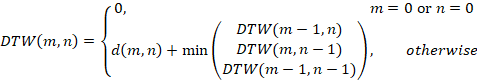
meaning it matches the patterns in the download rate and then compares them.

In [ ]:
from typing import List

import math
import statistics
import numpy as np
import pandas as pd
from collections import deque
from scipy import ndimage
from dtw import dtw
import csv
import matplotlib.dates as md
import matplotlib.pyplot as plt
import os
from datetime import datetime
# Gets "clean files day data.csv"
# return distances

dateTimeObj = datetime.now()
starttimestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('START Timestamp : ', starttimestampStr)


class minDistances:

    def __init__(self, num_files, K):
        self.k = K
        self.num_files = num_files
        self.min_data = [[(float('Inf'), 0, 0) for _ in range(K)] for _ in range(num_files)]      #k-min distances per file
        self.distances = [[float('Inf') for _ in range(num_files)] for _ in range(num_files)]      #distance per file
        self.all_data = []      #distance of all files
        # self.mean_distances_min = []
        # self.std_distances_min = []
        self.statistics = []

    def insert_distances(self, i, j, value):
        self.distances[i][j]= value
        self.distances[j][i]= value

    def insert(self, fileIndex, value):
        if (fileIndex == 200):
            print("a")
        (distance, id, malicious) = value
        if (self.min_data[fileIndex][self.k - 1][0] <= value[0]):
            return False
        else:
            for i in range(self.k ):
                if (self.min_data[fileIndex][i][0] > value[0]):
                    break;
        self.min_data[fileIndex].insert(i, value)
        self.min_data[fileIndex].pop()
        assert (len(self.min_data[fileIndex]) == self.k)
        return True

    def print_min(self):
        for i in range(self.num_files):
            print("file {0}: {1}\n".format(all_data_Day["Sha1ID"][i], self.min_data[i]))

    def print_all(self):
        for i in range(len(self.all_data)):
            print("{0}. {1}\n".format(i, self.all_data[i]))

    def get_Kbest_info(self, fileIndex):
        dist=[]
        isMal=[]
        for (distance, id, malicious) in  self.min_data[fileIndex]:
            dist.append(distance)
            isMal.append(malicious)
        return (dist,isMal)

    def calc_statisics(self):
        if(self.statistics==[]):
            self.statistics = pd.DataFrame([],  columns=["K best distances","K is malicius","K's mean","K's median", "K's std","K's malicios percentage","K's clean percentage","All's mean", "All's median","All's std_i"])
            stats=[]
            for i in range(self.num_files):
                if (j == 200):
                    print("a")
                #-----k best----
                (k_dist, k_isMal) = self.get_Kbest_info(i)
                k_mean_i= np.mean(k_dist)
                k_median_i = np.median(k_dist)
                k_std_i =np.std(k_dist)
                k_mal_precent=k_isMal.count(True)*100/self.k
                k_clean_precent = k_isMal.count(False) * 100 / self.k

                # -----all data----
                all_dist_i = self.distances[i]
                all_dist_i[i]=0 #remove inf in dist(self,self)
                all_dist_mean = np.mean(all_dist_i)
                all_dist_median_i = np.median(all_dist_i)
                all_dist_std_i = np.std(all_dist_i)
                max_dist=max(all_dist_i)
                min_dist=k_dist[0]

                data_for_file = pd.DataFrame([[k_dist,k_isMal,k_mean_i,k_median_i, k_std_i,k_mal_precent,k_clean_precent, all_dist_mean, all_dist_median_i, all_dist_std_i,max_dist,min_dist]],
                                             columns=["K best distances","K is malicius","K's mean","K's median",
                                                      "K's std","K's malicios percentage","K's clean percentage","All's mean", "All's median","All's std_i","Max dist","Min dist"])
                self.statistics = self.statistics.append(data_for_file, ignore_index=True)
        return self.statistics
def recenter(arr, arr_center):
    items = deque(arr)
    for i in range(len(arr)):
        items.append(0)
    items.rotate(len(arr) - int(arr_center))
    return np.array(items)


k = 15
cleanDay=pd.read_csv("clean files day data.csv")[["Sha1ID", "Day_Array", "Malicious"]]
malnDay = pd.read_csv("malicious files day data.csv")[["Sha1ID", "Day_Array", "Malicious"]]
all_data_Day=pd.concat([malnDay,cleanDay], axis=0,ignore_index=True)
kbest_clean_Euclidean = minDistances(len(all_data_Day), k)
kbest_clean_DTW = minDistances(len(all_data_Day), k)

sum_euclidian = 0
sum_dtw = 0
counter = 0
z = 0

# --------Euclidean distance:----------------
dateTimeObj = datetime.now()
STARTEuclidean = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('START Euclidean Timestamp : ', STARTEuclidean)
for i in range(0, len(all_data_Day)):
    id1 = all_data_Day.iloc[i]["Sha1ID"]
    mal1 = all_data_Day.iloc[i]["Malicious"]
    for j in range(i + 1, len(all_data_Day)):
        print("i={0},j={1}\n".format(i,j))
        id2 = all_data_Day.iloc[j]["Sha1ID"]
        mal2 = all_data_Day.iloc[j]["Malicious"]

        a = all_data_Day["Day_Array"][i]
        a = map(int, list(a[1:-1].split()))
        a = np.array([int(s) for s in a])
        b = all_data_Day["Day_Array"][j]
        b = map(int, list(b[1:-1].split()))
        b = np.array([int(s) for s in b])
        # if sum(a) <= 2 or sum(b) <= 2:
        #     z = z + 1
        #     break
        # -------- Centerized Euclidean distance:----------------
        a_center = ndimage.measurements.center_of_mass(a)[0]
        b_center = ndimage.measurements.center_of_mass(b)[0]
        a_recenter = recenter(a, a_center)
        b_recenter = recenter(b, b_center)
        # print("Centerized Euclidean distance for files", all_data_Day.iloc[i]["Sha1ID"], all_data_Day.iloc[j]["Sha1ID"])
        # print(np.linalg.norm(a_recenter - b_recenter))
        res=(np.linalg.norm(a_recenter - b_recenter))
        kbest_clean_Euclidean.insert(i,(res,id2,mal2))
        kbest_clean_Euclidean.insert(j,(res,id1,mal1))
        kbest_clean_Euclidean.insert_distances(i, j, res)
        kbest_clean_Euclidean.all_data.append(res)
        sum_euclidian = sum_euclidian + res
dateTimeObj = datetime.now()
ENDEuclidean = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('END Euclidean Timestamp : ', ENDEuclidean)

# --------DTW distance:----------------
dateTimeObj = datetime.now()
startDTW = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('START DTW Timestamp : ', startDTW)
for i in range(0, len(all_data_Day)):
    id1 = all_data_Day.iloc[i]["Sha1ID"]
    mal1 = all_data_Day.iloc[i]["Malicious"]
    for j in range(i + 1, len(all_data_Day)):
        print("i={0},j={1}\n".format(i, j))
        id2 = all_data_Day.iloc[j]["Sha1ID"]
        mal2 = all_data_Day.iloc[j]["Malicious"]

        a = all_data_Day["Day_Array"][i]
        a = map(int, list(a[1:-1].split()))
        a = np.array([int(s) for s in a])
        b = all_data_Day["Day_Array"][j]
        b = map(int, list(b[1:-1].split()))
        b = np.array([int(s) for s in b])
        # if sum(a) <= 2 or sum(b) <= 2:
        #     z = z + 1
        #     break

        # ------ DTW:----------
        x = a.reshape(-1, 1)  # reshape to make it work
        y = b.reshape(-1, 1)
        l2_norm = lambda x, y: (x - y) ** 2  # Here, we use L2 norm as the element comparison distance
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
        # print("DTW:", d)
        kbest_clean_DTW.insert(i, (d, id2, mal2))
        kbest_clean_DTW.insert(j, (d, id1, mal1))

        kbest_clean_DTW.insert_distances(i, j, d)
        sum_dtw = sum_dtw + d
        kbest_clean_DTW.all_data.append(d)

        counter = counter + 1

dateTimeObj = datetime.now()
ENDDTW = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print('END DTW Timestamp : ', ENDDTW)

# ----------------------------- statistics all files --------------------
all_stat=pd.DataFrame([],columns=["Name", "Mean", "Median",  "Std", "Max", "Min"])
#---------- Euclidean: ------------
Euclidean_statistics=kbest_clean_Euclidean.calc_statisics()
Euclidian_average = sum_euclidian / counter
Euclidian_std=statistics.pstdev(kbest_clean_Euclidean.all_data)
Euclidian_median=statistics.median(kbest_clean_Euclidean.all_data)
Euclidian_Min=min(Euclidean_statistics["Min dist"])
Euclidian_Max=max(Euclidean_statistics["Max dist"])

data_for_file = pd.DataFrame([["Euclidian",Euclidian_average, Euclidian_median, Euclidian_std, Euclidian_Max, Euclidian_Min]],
                             columns=["Name", "Mean", "Median",  "Std", "Max", "Min"])
all_stat = all_stat.append(data_for_file, ignore_index=True)

#---------- DTW: ------------
DTW_statistics=kbest_clean_DTW.calc_statisics()
DTW_average = sum_dtw / counter
DTW_std=statistics.pstdev(kbest_clean_DTW.all_data)
DTW_median=statistics.median(kbest_clean_DTW.all_data)
DTW_Min=min(DTW_statistics["Min dist"])
DTW_Max=max(DTW_statistics["Max dist"])
data_for_file = pd.DataFrame([["DTW",DTW_average,DTW_median, DTW_std,DTW_Max, DTW_Min]],
                             columns=["Name", "Mean", "Median",  "Std", "Max", "Min"])
all_stat = all_stat.append(data_for_file, ignore_index=True)

parent_dir = os.getcwd()
all_stat.to_csv(os.path.join(parent_dir, "all data's statistics.csv"))
Euclidean_statistics.to_csv(os.path.join(parent_dir, "Euclidean Distances.csv"))
DTW_statistics.to_csv(os.path.join(parent_dir, "DTW Distances.csv"))

dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print(',END Timestamp : ', timestampStr)

fileML = open("Distances timestamp", "a+")  # append mode
print(',START Timestamp : ', starttimestampStr)

fileML.write('START Euclidean : '+ STARTEuclidean )
fileML.write('END Euclidean : '+ ENDEuclidean )
fileML.write('START DTW : '+ startDTW )
fileML.write('END DTW : '+ ENDDTW )

fileML.write('END Timestamp : '+ timestampStr)
fileML.write('\n ----------- \n')
fileML.close()
print("finished")



## Step three- Features Analysis
For each file we have selected a number of properties, wich we will pass to the ML model to distinguish between clean and malicious files. For each file we extracted three types of properties  :

### 1. Prevalence feature - file download frequency, total downloads on different machines each day.
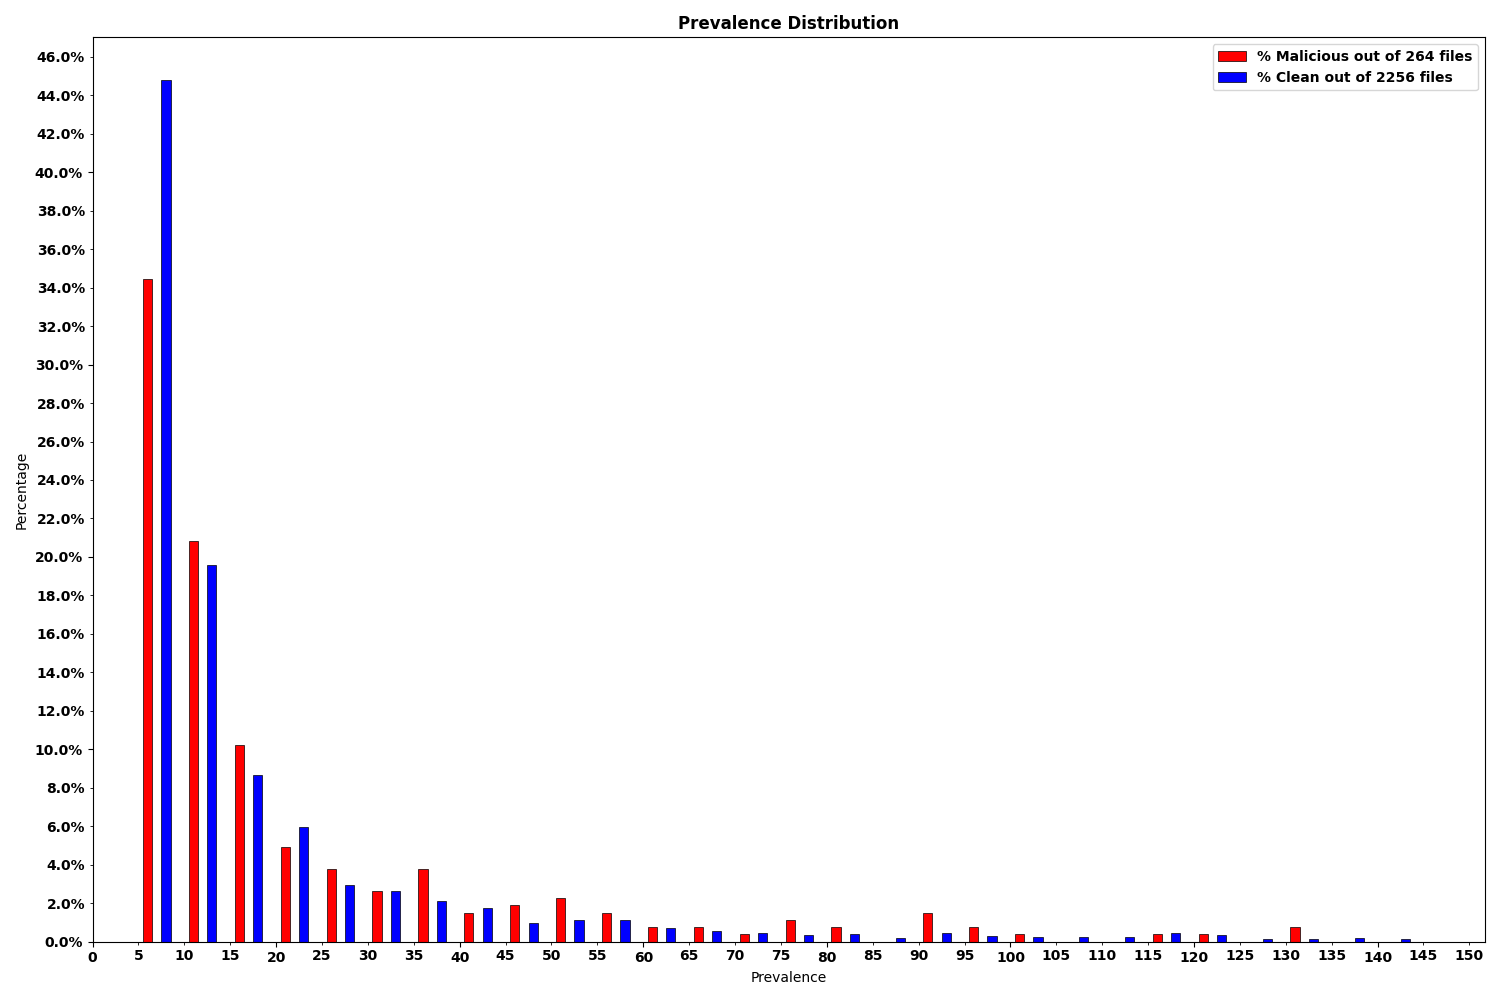

### 2. Size - File size in KB.
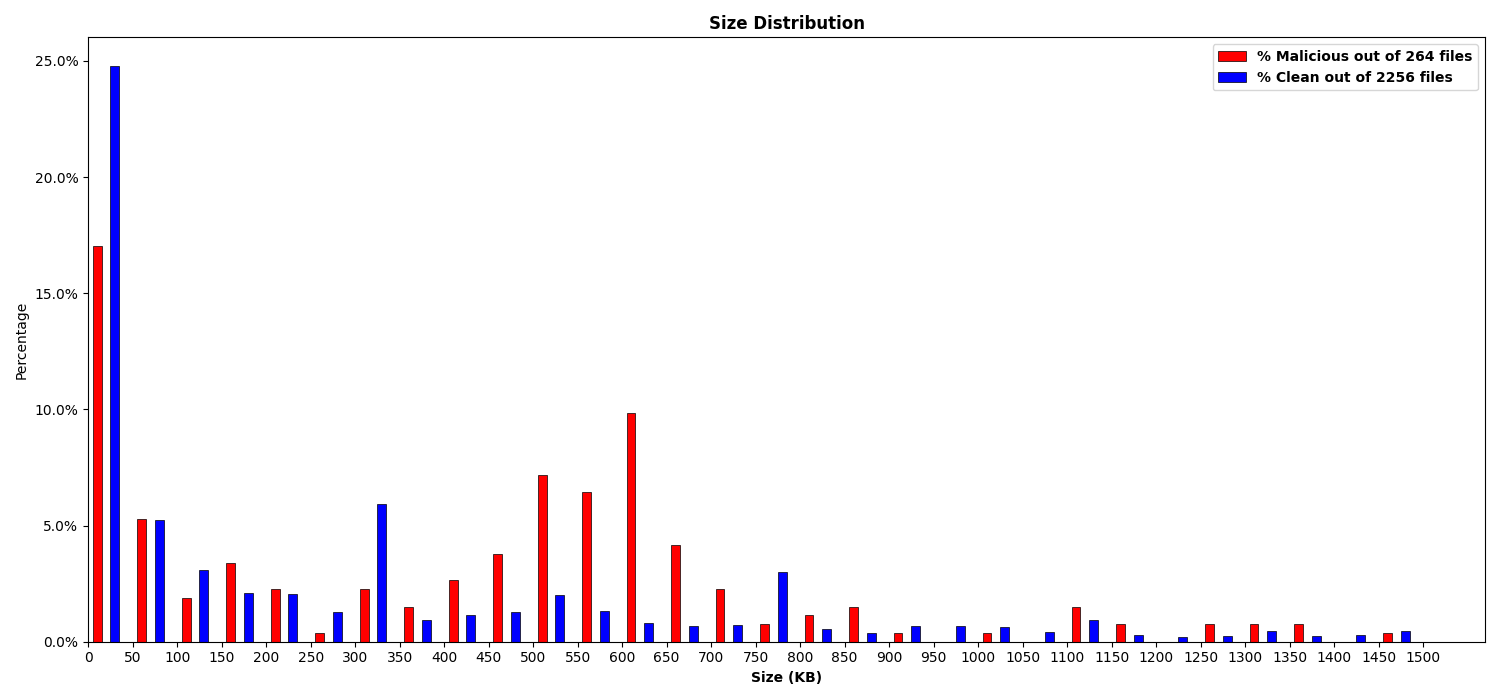

### 3. DTW / Euclidean 5/10/15 Malicious- Represents the percentage of malicious files out of the 5/10/15 files closest to each file in each method.
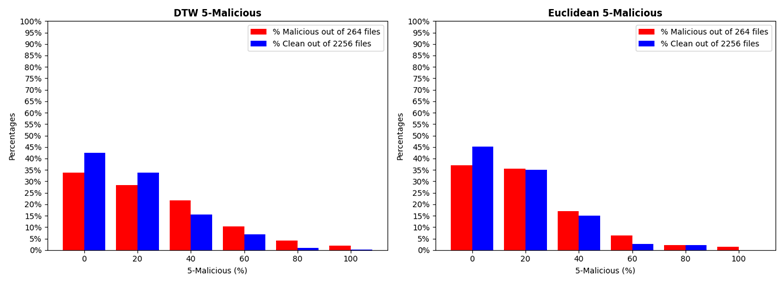

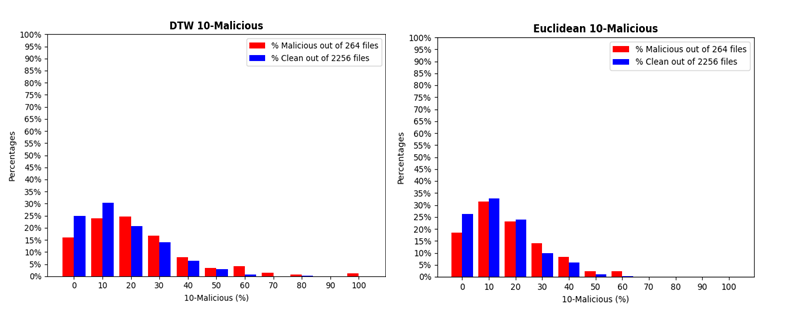

### 4. Day Count Mean- Indicates the average daily downloads of the files.
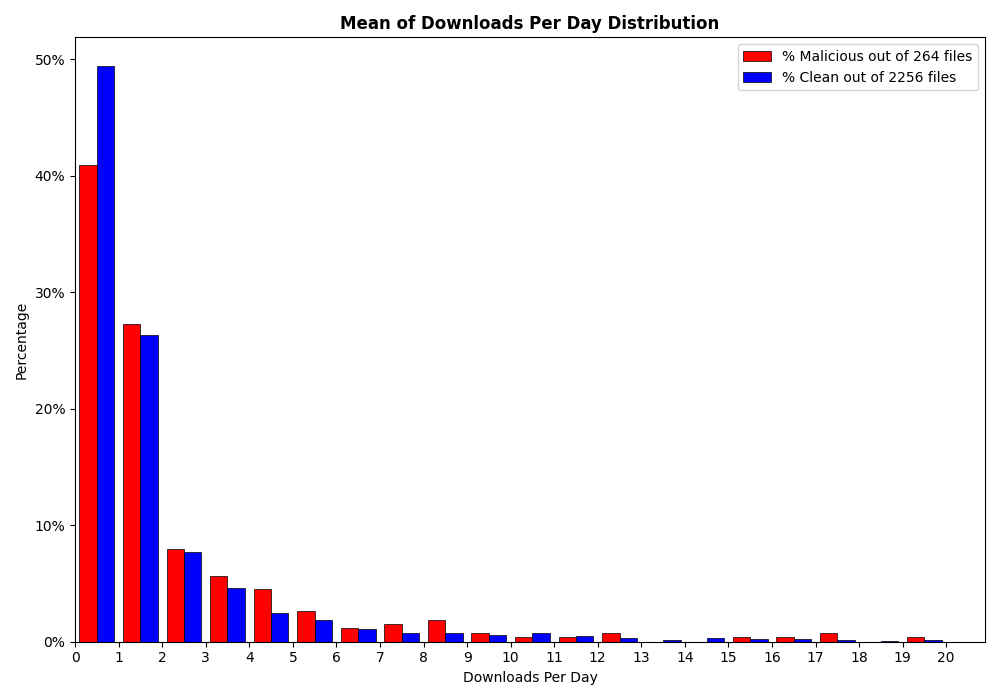

### 5. Peaks- Indicates the number of days in the time series in which the number of downloads exceeded 3.
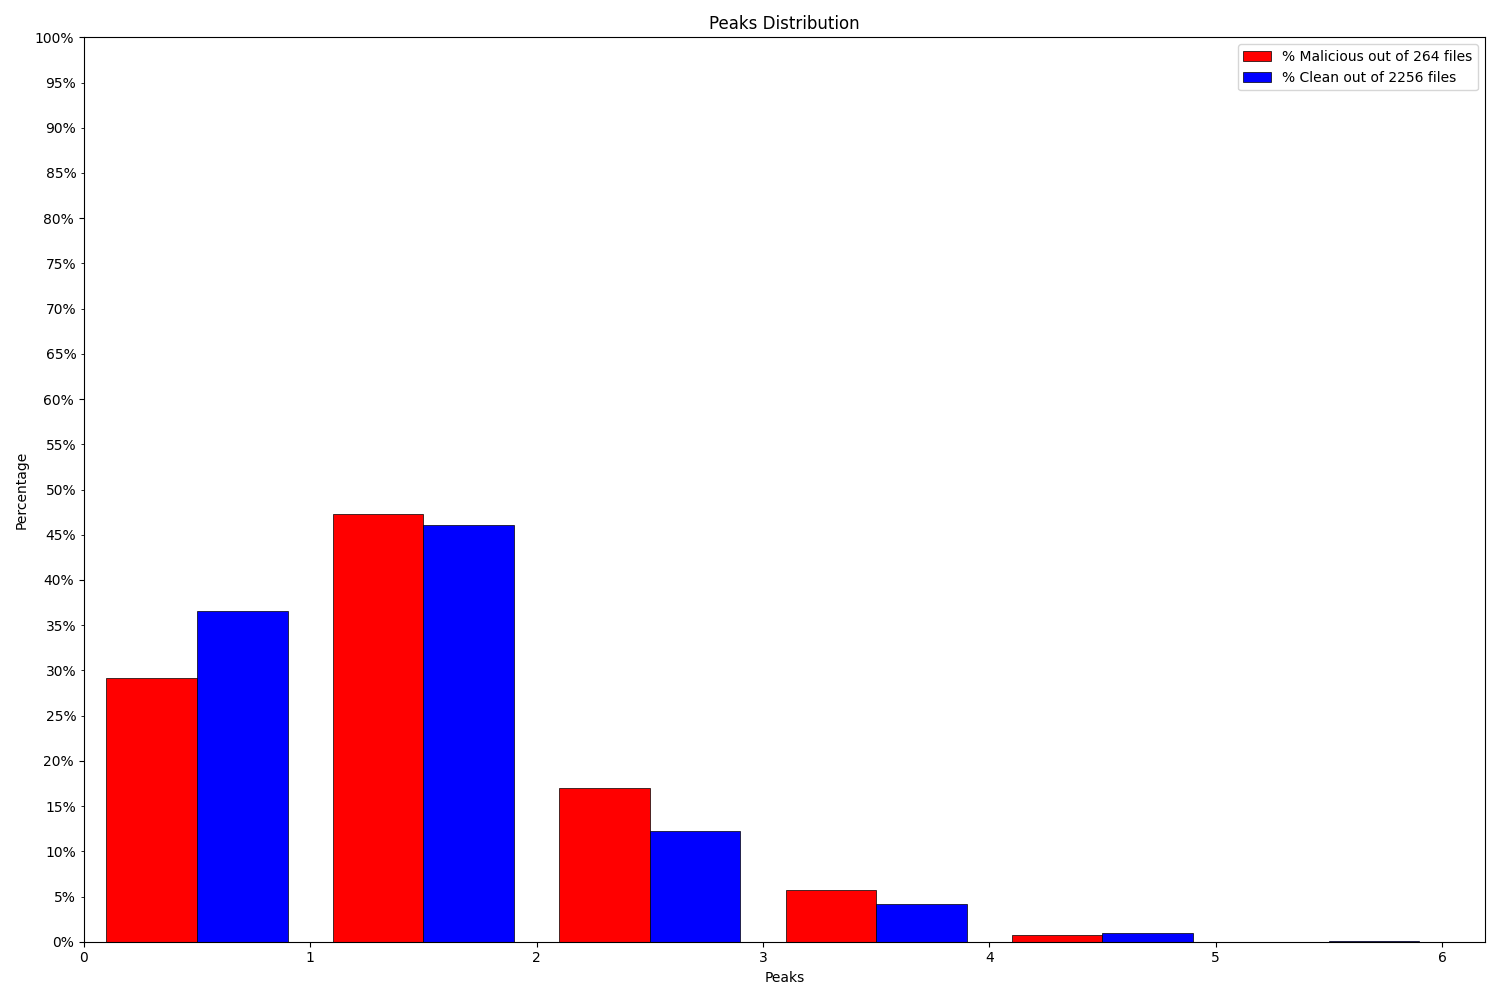

### 6.Sharp Peaks- Indicates the number of days in the time series in which the difference between the number of downloads in that day and the downloads in its surrounding exceeds 15.<br> We used a topographic  prominence algorithm to find peakes that stand out above their surrounding.
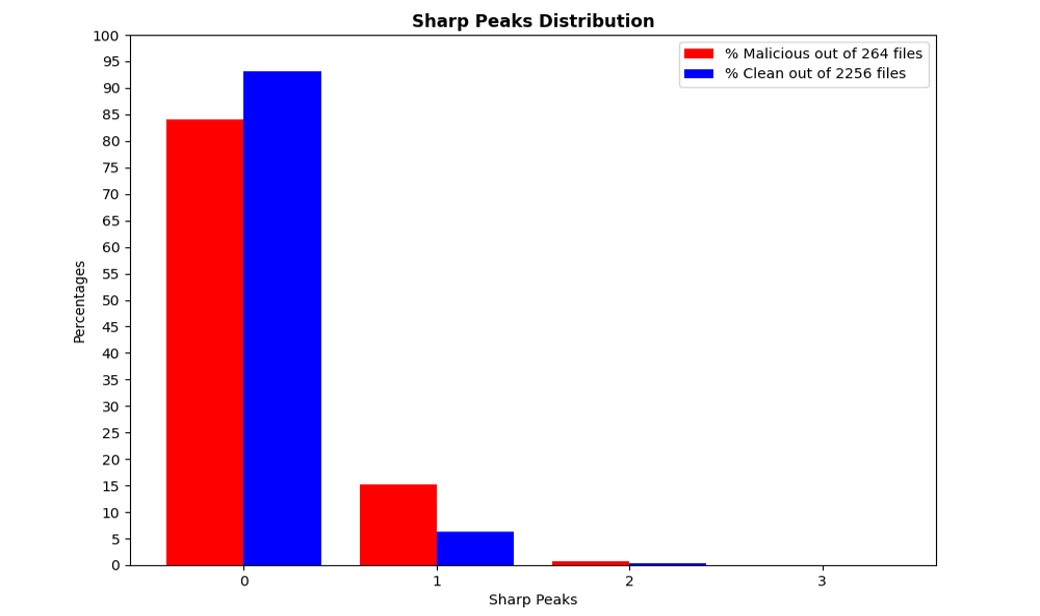

### 7. Day Count STD- Indicates the standard deviation of the number of downloads per day.
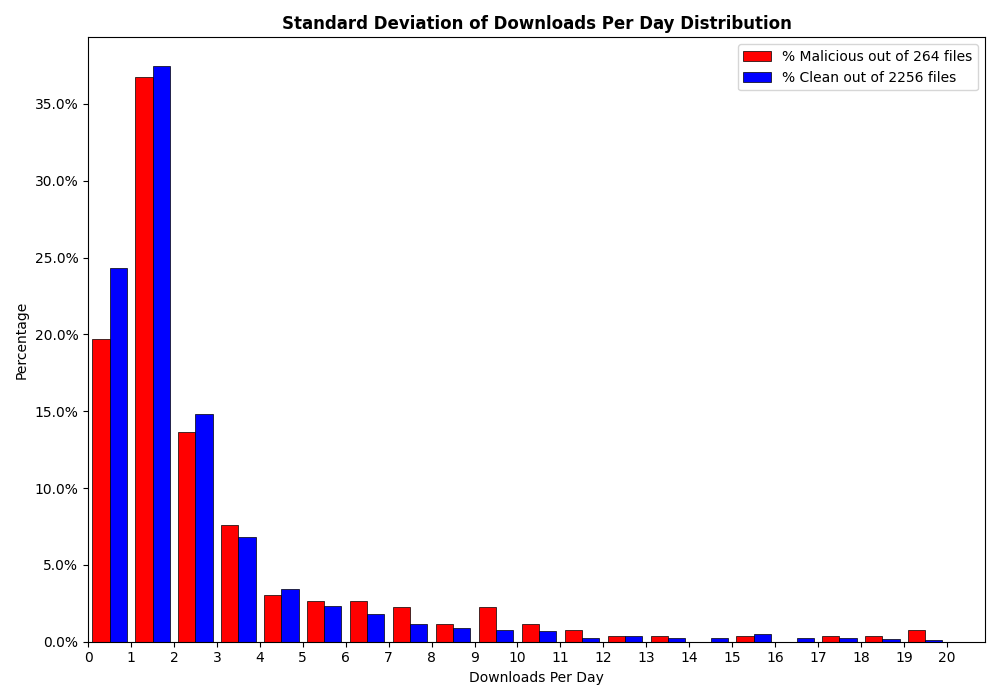

### 8. Max Day Count- Displays the distribution of the maximum number of downloads in each time series for each file.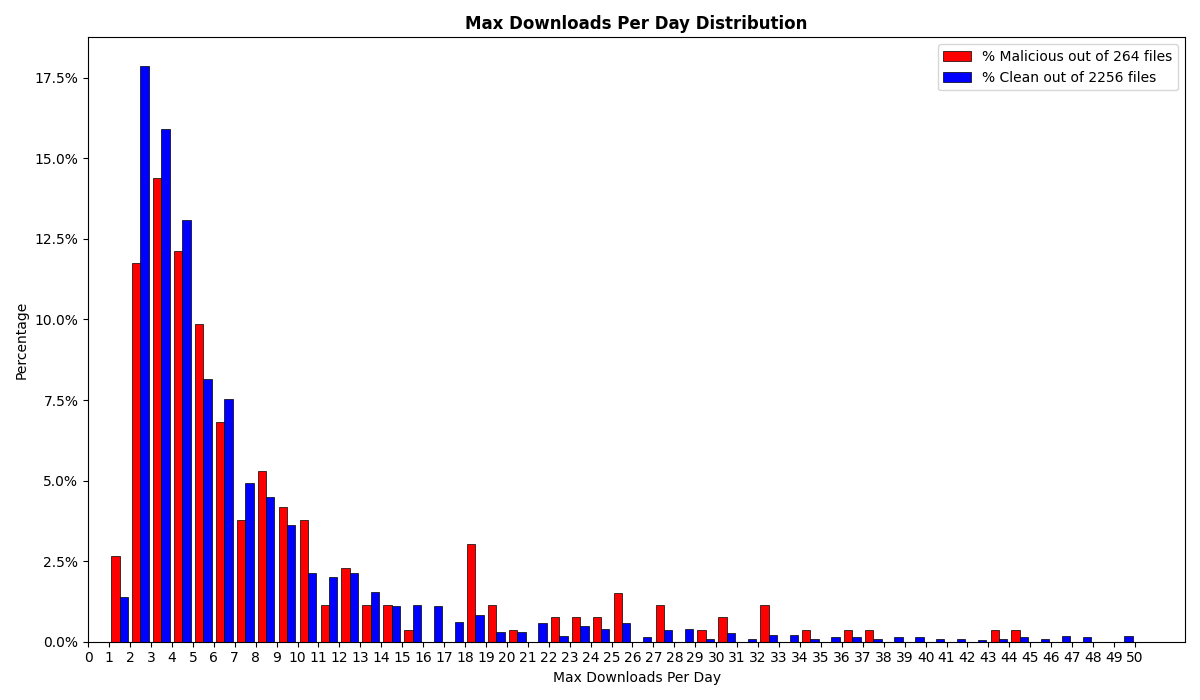

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import numpy as np
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_prominences

# #-------------Get the data-----------
malFile = pd.read_csv('malicious files day data.csv')[["Sha1ID","Malicious", "Mean", "Std", "Size"]]
cleanFile = pd.read_csv('clean files day data.csv')[["Sha1ID","Malicious", "Mean", "Std", "Size"]]

dtw = pd.read_csv('DTW Distances.csv')[["K's mean","K's median","K's std","K's malicios percentage"]]
euclidian = pd.read_csv('Euclidean Distances.csv')[["K's mean","K's median","K's std","K's malicios percentage"]]

features = pd.concat([malFile, cleanFile], axis=0, ignore_index=True)
distances = pd.concat([dtw, euclidian], axis=1,ignore_index=True)

features = pd.concat([features, distances],axis=1,ignore_index=True)

features.columns = ["Sha1ID","Malicious","Day count Mean","Day count STD","Size","DTW k-mean","DTW k-median","DTW k-STD","DTW k-Malicious(%)",
                    "Euclidean k-mean","Euclidean k-median","Euclidean k-STD","Euclidean k-Malicious(%)"]
#----max,min,Prevalence--
malFile_array = pd.read_csv('malicious files day data.csv')[["Day_Array"]]
cleanFile_array  = pd.read_csv('clean files day data.csv')[["Day_Array"]]
arrays = pd.concat([malFile_array, cleanFile_array], axis=0, ignore_index=True)
features.insert(4, 'max Day count', 'default value 0')
features.insert(5, 'min Day count', 'default value 0')
features.insert(15, 'Prevalence', 'default value 0')
features.insert(16, 'Peaks',     'default value ')
features.insert(17, 'Sharp peaks','default value ')

for i in range(len(arrays)):
    a = arrays["Day_Array"][i]
    a = map(int, list(a[1:-1].split()))
    a = np.array([int(s) for s in a])
    features.at[i, 'max Day count'] = float(max(a))
    features.at[i, 'min Day count'] = float(min(a))
    features.at[i, 'Prevalence'] = float(sum(a))
    #------Peaks----
    peaks = argrelextrema(a, np.greater, mode='wrap')
    peaks = peaks[0][a[peaks[0]] > 3]
    features.at[i, 'Peaks'] = len(peaks)
    #------Sharp peaks----
    prominences = peak_prominences(a, peaks)[0]
    sharp_peaks_over = peaks
    for j in range(len(peaks) - 1, -1, -1):
        if prominences[j] < 15:
            sharp_peaks_over = np.delete(sharp_peaks_over, j, 0)
    features.at[i, 'Sharp peaks'] = len(sharp_peaks_over)

#create features.csv
parent_dir = os.getcwd()
features.to_csv(os.path.join(parent_dir, "features.csv"))

#------------------------Data exploration---------------------------------
features = pd.read_csv('features.csv')
numoffiles = len(features["Sha1ID"])
# sns.countplot(x='Malicious',data=features)
# plt.show()
malFeature=features[features['Malicious']==True]
cleanFeature=features[features['Malicious']==False]
countMal=len(malFeature)
countClean=len(cleanFeature)
w_mal = np.ones(len(malFeature))/ countMal
w_clean= np.ones(len(cleanFeature))/ countClean
for title in list(features.columns)[2:] :
    new_title = title.strip()
    print(new_title)

    if title == "Malicious":
        sns.countplot(x='Malicious', hue='Malicious', data=features)
        # plt.hist(malFeature[title], weights=w_mal,label="% Malicious out of {0} files".format(countMal)
        #          ,color='r',edgecolor='black',stacked=False)
        # plt.hist(cleanFeature[title], weights=w_clean,
        #          label="% Clean out of {0} files".format(countClean)
        #          , color='b', edgecolor='black',stacked=False)

    elif title == 'Size':
        plt.figure(figsize=(15, 7))
        bins = np.arange(0, 1001, 50)
        width = 10
        kbSizeMal = malFeature[title] / 1000
        kbSizeClean = cleanFeature[title] / 1000

        (n, bins, patches) = plt.hist([kbSizeMal, kbSizeClean],
                                      bins=bins, width=width, weights=[w_mal, w_clean],
                                      label=["% Malicious out of {0} files".format(countMal),
                                             "% Clean out of {0} files".format(countClean)],
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        plt.rc('font', weight='bold')
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        ax.set_xlim(xmin=0)
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.legend(loc='upper right')
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.ylabel("Percentage")
        plt.xlabel("{0} (KB)".format(title))
        plt.tight_layout()

    elif (title == "Prevalence"):
        plt.figure(figsize=(12, 7))
        bins = np.arange(0, 151, 5)
        width = 2
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        plt.rc('font', weight='bold')
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        ax.set_xlim(xmin=0)
        plt.title("{0} Distribution".format(title), fontweight='bold')
        ax.set_ylim(ymax=1)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)


    elif title == "max Day count":
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 200, 5)
        # print(bins)
        width = 2
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, width=width, weights=[w_mal, w_clean],
                                      label=["% Malicious out of {0} files".format(countMal),
                                             "% Clean out of {0} files".format(countClean)],
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        ax.xaxis.set_minor_formatter(ticker.ScalarFormatter(0))
        ax.set_xlim(xmin=0)
        #ax.set_ylim(ymax=1)

        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper right')
        plt.title("Max Day Count Distribution".format(title))
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        # ax.set_xlim(xmin=0,xmax=max(features[title]+0.1))
        plt.minorticks_on()
        # ax.xaxis.set_major_locator(ticker.MultipleLocator())

    # elif new_title == "Prevalence":
    #     plt.figure(figsize=(15, 10))
    #
    #     bins = np.arange(0, 151, 5)
    #     # print(bins)
    #     width = 1
    #     (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
    #                                   bins, width=width, weights=[w_mal, w_clean],
    #                                   label=["% Malicious out of {0} files".format(countMal),
    #                                          "% Clean out of {0} files".format(countClean)],
    #                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)
    #     ax = plt.gca()
    #     ax.xaxis.set_minor_formatter(ticker.ScalarFormatter(0))
    #     ax.set_xlim(xmin=min(cleanFeature[title]))
    #     ax.yaxis.set_major_formatter(PercentFormatter(1))
    #     ax.yaxis.set_minor_formatter(PercentFormatter(1))
    #
    #     plt.legend(loc='upper right')
    #     plt.title("{0} Distribution".format(title))
    #     plt.ylabel("Percentage")
    #     plt.xlabel("{0}".format(title))
    #     plt.tight_layout()
    #     # ax.set_xlim(xmin=0,xmax=max(features[title]+0.1))
    #     plt.minorticks_on()
    #     # ax.xaxis.set_major_locator(ticker.MultipleLocator())

    elif (title == "DTW k-median"):
        plt.figure(figsize=(15, 10))

        bins = np.arange(0, 301, 10)
        #print(bins)
        width = 4
        (n,bins,patches) = plt.hist([malFeature[title],cleanFeature[title]],
                                   bins, width=width, weights=[w_mal, w_clean],
                                   label=["% Malicious out of {0} files".format(countMal),
                                          "% Clean out of {0} files".format(countClean)],
                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        ax.xaxis.set_minor_formatter(ticker.ScalarFormatter(0))
        ax.set_xlim(xmin=min(cleanFeature[title]))
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper right')
        plt.title ("{0} Distribution".format(title))
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title), fontweight='bold')
        plt.tight_layout()
        #ax.set_xlim(xmin=0,xmax=max(features[title]+0.1))
        plt.minorticks_on()
        # ax.xaxis.set_major_locator(ticker.MultipleLocator())

    elif (title == "Euclidean k-median"):
        plt.figure(figsize=(15, 10))

        bins = np.arange(0, 301, 10)
        #print(bins)
        width = 4
        (n,bins,patches) = plt.hist([malFeature[title],cleanFeature[title]],
                                   bins, width=width, weights=[w_mal, w_clean],
                                   label=["% Malicious out of {0} files".format(countMal),
                                          "% Clean out of {0} files".format(countClean)],
                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        ax.xaxis.set_minor_formatter(ticker.ScalarFormatter(0))
        ax.set_xlim(xmin=min(cleanFeature[title]))
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper right')
        plt.title ("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        #ax.set_xlim(xmin=0,xmax=max(features[title]+0.1))
        plt.minorticks_on()
        # ax.xaxis.set_major_locator(ticker.MultipleLocator())

    elif (title == "Day count Mean"):
        plt.figure(figsize=(15, 10))

        bins = np.arange(0, 101, 10)
        #print(bins)
        width = 0.1
        (n,bins,patches) = plt.hist([malFeature[title],cleanFeature[title]],
                                   bins, width=width, weights=[w_mal, w_clean],
                                   label=["% Malicious out of {0} files".format(countMal),
                                          "% Clean out of {0} files".format(countClean)],
                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        ax.xaxis.set_minor_formatter(ticker.ScalarFormatter(0))
        ax.set_xlim(xmin=min(cleanFeature[title]))
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper right')
        plt.title ("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        #ax.set_xlim(xmin=0,xmax=max(features[title]+0.1))
        plt.minorticks_on()
        # ax.xaxis.set_major_locator(ticker.MultipleLocator())

    elif (title == "Day count STD"):
        plt.figure(figsize=(15, 10))
        #bins = np.arange(0, 5)

        bins = np.arange(0, 11, 1)
        #print(bins)
        width = 0.4
        (n,bins,patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                   bins=bins, width=width, weights=[w_mal, w_clean],
                                   label=["% Malicious out of {0} files".format(countMal),
                                          "% Clean out of {0} files".format(countClean)],
                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MaxNLocator(11))
        ax.xaxis.set_minor_locator(ticker.MaxNLocator(1))
        ax.set_xlim(xmin=0)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper right')
        plt.title ("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()

    elif (title == "DTW k-Malicious(%)"):
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 101, 10)
        width = 0.4
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n,bins,patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                   bins=bins,  weights=[w_mal, w_clean], label=label,
                                   color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))

        plt.legend(loc='upper left')
        plt.title ("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif title == 'Euclidean k-Malicious(%)':
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 101, 5)
        width = 0.4
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper left')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "DTW k-STD"):
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 51, 1)
        width = 0.1
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "Euclidean k-STD"):
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 51, 1)
        width = 0.1
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "DTW k-mean"):
        plt.figure(figsize=(11, 7))
        bins = np.arange(0, 51, 1)
        width = 0.1
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymax=1)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "Euclidean k-mean"):
        plt.figure(figsize=(15, 10))
        bins = np.arange(0, 51, 1)
        width = 0.1
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymax=1)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "Peaks"):
        plt.figure(figsize=(5, 4))
        bins = np.arange(0, 7, 1)
        width = 0.3
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        plt.rc('font', weight='bold')
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymax=1)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("{0} Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    elif (title == "Sharp peaks"):
        print("A")
        plt.figure(figsize=(5, 4))
        bins = np.arange(0, 5, 1)
        width = 0.05
        label = ["% Malicious out of {0} files".format(countMal),
                 "% Clean out of {0} files".format(countClean)]
        (n, bins, patches) = plt.hist([malFeature[title], cleanFeature[title]],
                                      bins=bins, weights=[w_mal, w_clean], label=label,
                                      color=['r', 'b'], edgecolor='black', linewidth=0.5)
        ax = plt.gca()
        plt.rc('font', weight='bold')
        ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
        # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymax=1)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_minor_formatter(PercentFormatter(1))
        plt.legend(loc='upper right')
        plt.title("Sharp Peaks Distribution".format(title), fontweight='bold')
        plt.ylabel("Percentage")
        plt.xlabel("{0}".format(title))
        plt.tight_layout()
        plt.minorticks_on()
        ax.xaxis.set_tick_params(which='minor', bottom=False)

    # plt.figure(figsize=(10, 7))
    # bins = np.arange(0, 51, 1)
    # width = 0.1
    # label = ["% Malicious out of {0} files".format(countMal),
    #          "% Clean out of {0} files".format(countClean)]
    # (n, bins, patches) = plt.hist([malFeature["DTW k-mean"], cleanFeature["DTW k-mean"]],
    #                               bins=bins, weights=[w_mal, w_clean], label=label,
    #                               color=['r', 'b'], edgecolor='black', linewidth=0.5)
    #
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(ticker.FixedLocator(bins))
    # # ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=-1))
    # ax.set_xlim(xmin=0)
    # ax.set_ylim(ymax=1)
    # ax.yaxis.set_major_formatter(PercentFormatter(1))
    # ax.yaxis.set_minor_formatter(PercentFormatter(1))
    # plt.legend(loc='upper right')
    # plt.title("DTW k-mean Distribution".format(title))
    # plt.ylabel("Percentage")
    # plt.xlabel("DTW k-mean".format(title))
    # plt.tight_layout()
    # plt.minorticks_on()
    # ax.xaxis.set_tick_params(which='minor', bottom=False)

    path = os.path.join(parent_dir, "{0} Distribution.png".format(title))
    plt.savefig(path)
    plt.clf()
    plt.close()
    #print("{0}\n".format(title))



## Step Four - Machine Learning
We trained two types of models - Logistic Regression and TreeClassifier on the train dataset.<br> We ran 5-Fold Cross Validation on each of the models.
The score of each model is determined by the average of the scores of the runs.<br> The highest score was obtained for tree model with a depth equal to 3.

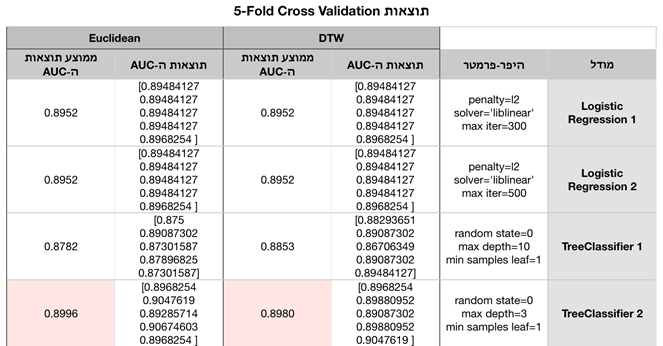

After running the selected model on the test dataset on the we can see the importance of each characteristic.

The coefficient of each feature represents the correlation between it and the classification of the file as malicious by the model.

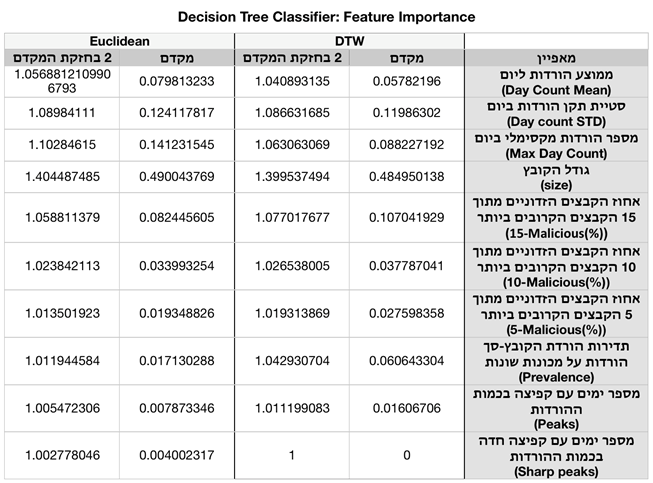

### Model results for each distance calculation method:

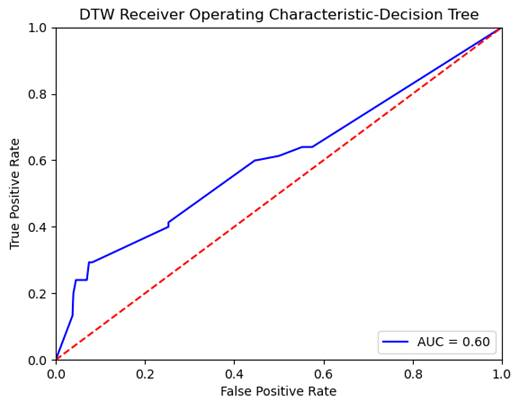

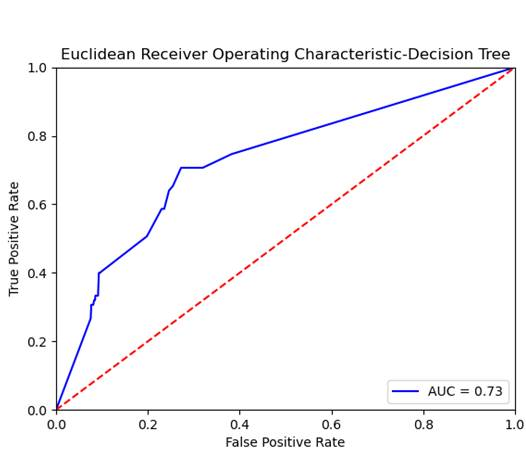

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


def LogisticRegression_Classifier(logmodel):
    def ML_LogisticRegression( X_train, X_test, Y_train, Y_test):
        fileML = open("DTW Ml data.txt", "a+")  # append mode
        # logmodel = LogisticRegression(penalty=Penalty,  # l2 and l2
        #                               solver='liblinear',
        #                               max_iter=Max_iter )
        result = logmodel.fit(X_train, Y_train)
        probs = logmodel.predict_proba(X_test)
        preds = probs[:,1]
        # print(preds)
        fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        plt.title('DTW Receiver Operating Characteristic-Logistic Regression')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

        path = os.path.join(parent_dir, "Logistic Regression")
        plt.savefig(path)
        plt.show()
        print('finished Logistic Regression')


        fileML.write("Logistic Regression coeff: \n")
        for i in range(len(logmodel.coef_[0])):
            print(X_train.columns[i])
            fileML.write("{0}: ".format(X_train.columns[i]))
            print("coeff: " + str(logmodel.coef_[0][i]))
            fileML.write("coeff: {0} ,".format(str(logmodel.coef_[0][i])))
            print("2^coeff: " + str(2.0**(logmodel.coef_[0][i])))
            fileML.write("2^coeff: {0} \n".format(str(2.0**(logmodel.coef_[0][i]))))

        fileML.write("------------------------------------------\n")
        fileML.close()
    return ML_LogisticRegression


def Decision_Tree_Classifier(clf):
    def ML_tree( X_train, X_test, Y_train, Y_test):
         fileML = open("Ml data.txt", "a+")  # append mode
         def tree_to_code(tree, feature_names):
            tree_ = tree.tree_
            feature_name = [
                feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
                for i in tree_.feature]

            print ("def tree({}):\n".format(", ".join(feature_names)))
            fileML.write("def tree({}):\n".format(", ".join(feature_names)))

            def recurse(node, depth):
                indent = "  " * depth
                if tree_.feature[node] != _tree.TREE_UNDEFINED:
                    name = feature_name[node]
                    threshold = tree_.threshold[node]
                    print("{}if {} <= {}:\n".format(indent, name, threshold))
                    fileML.write("{}if {} <= {}:\n".format(indent, name, threshold))
                    recurse(tree_.children_left[node], depth + 1)
                    print("{}else:  # if {} > {}\n".format(indent, name, threshold))
                    fileML.write("{}else:  # if {} > {}\n".format(indent, name, threshold))
                    recurse(tree_.children_right[node], depth + 1)
                else:
                    print("{}return {}\n".format(indent, tree_.value[node]))
                    fileML.write("{}return {}\n".format(indent, tree_.value[node]))

            recurse(0, 1)
            fileML.write("\n")
            # clf = DecisionTreeClassifier().fit(iris.data, iris.target)
            plot_tree(tree, filled=True)
            plt.show()
         clf = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_leaf=1)
         result = clf.fit(X_train, Y_train)

         probs = clf.predict_proba(X_test)
         preds = probs[:, 1]
         fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
         roc_auc = metrics.auc(fpr, tpr)

         #---------print----------------------------------------------
         # ----------tree----------------
         print(clf.feature_importances_)
         fileML.write("DTW Decision Tree Classifier feature_importances: \n")
         for i in range(len(clf.feature_importances_)):
             print(X_train.columns[i])
             fileML.write("{0}: ".format(X_train.columns[i]))
             print(clf.feature_importances_[i])
             fileML.write("{0} \n".format(clf.feature_importances_[i]))
             print("2^coeff: " + str(2.0 ** (clf.feature_importances_[i])))
             fileML.write("2^coeff: {0} \n".format(str(2.0 ** (clf.feature_importances_[i]))))

         fileML.write("\n")

         dot_data = six.StringIO()
         export_graphviz(clf, out_file=dot_data,
                         feature_names=X_train.columns,
                         filled=True, rounded=True,
                         special_characters=True)
         graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
         graph.write_pdf("DTW Decision Tree Classifier.pdf")

         # ----------grapgh---------------------
         # method I: plt
         plt.title('DTW Receiver Operating Characteristic-Decision Tree')
         plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
         plt.legend(loc='lower right')
         plt.plot([0, 1], [0, 1], 'r--')
         plt.xlim([0, 1])
         plt.ylim([0, 1])
         plt.ylabel('True Positive Rate')
         plt.xlabel('False Positive Rate')
         path = os.path.join(parent_dir, "Decision Tree Classifier")
         plt.savefig(path)
         plt.show()
         print('finished')

         #----------function---------
         tree_to_code(clf,  ["Malicious", "Day count Mean", "Day count STD", 'max Day count', "Size",
     "DTW 15-Malicious(%)","DTW 10-Malicious(%)","DTW 5-Malicious(%)",
     "Prevalence", "Peaks", "Sharp peaks"
     ])

         fileML.write("----------------------------------------------\n")
         fileML.close()
    return ML_tree

#return the best function after cross val
def crossVal(X_train,Y_train):
    # Use cross_val_score on your all data
    # internal working of cross_val_predict:
    # 1. Get the data and estimator (logreg, X, Y)
    # 2. Split X, Y into X_train, X_test, Y_train, Y_test by using its internal cv
    # 3. Use X_train, Y_train for fitting 'logreg': Y_pred = logreg.predict(X_test) and calculate accuracy with Y_test.
    # 4. Repeat steps 1 to 3 for cv_iterations = 10
    # Return array of accuracies calculated in step 5.
    fileML = open("Ml data.txt", "a+")  # append mode
    fileML.write("DTW Cross Validation (5 fold):\n")

    #Logistic Regression cross_val
    name1="Logistic Regression(penalty='l2',solver='liblinear',max_iter=300)"
    fileML.write("1.1 {}: ".format(name1))
    logreg1 = LogisticRegression(penalty='l2',solver='liblinear',max_iter=300)
    scores_logreg1 = cross_val_score(logreg1, X_train, Y_train, cv=5)
    fileML.write(str(scores_logreg1))
    scores_logreg1 = scores_logreg1.mean()
    fileML.write(" => the avarage is {} \n".format(scores_logreg1))

    name2 = "Logistic Regression(penalty='l2', solver='liblinear', max_iter=500)"
    fileML.write("1.2 {}: ".format(name2))
    logreg2 = LogisticRegression(penalty='l2',
                                solver='liblinear',
                                max_iter=500)
    scores_logreg2 = cross_val_score(logreg2, X_train, Y_train, cv=5)
    fileML.write(str(scores_logreg2))
    scores_logreg2 = scores_logreg2.mean()
    fileML.write(" => the avarage is {} \n".format(scores_logreg2))


    # DecisionTree cross_val
    name3 = "TreeClassifier(random_state=0, max_depth=10, min_samples_leaf=1)"
    fileML.write("2.1 {}: ".format(name3))
    Dt1 = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_leaf=1)
    scores_Dt1 = cross_val_score(Dt1, X_train, Y_train, cv=5)
    fileML.write(str(scores_Dt1))
    scores_Dt1 = scores_Dt1.mean()
    fileML.write(" => the avarage is {} \n".format(scores_Dt1))

    name4 = "TreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1)"
    fileML.write("2.2 {}: ".format(name4))
    Dt2 = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1)
    scores_Dt2 = cross_val_score(Dt2, X_train, Y_train, cv=5)
    fileML.write(str(scores_Dt2))
    scores_Dt2 = scores_Dt2.mean()
    fileML.write(" => the avarage is {} \n".format(scores_Dt2))

    funcdict = [
      [name1, LogisticRegression_Classifier(logreg1)],
       [name2, LogisticRegression_Classifier(logreg2)],
       [name3, Decision_Tree_Classifier(Dt1)],
        [name4,Decision_Tree_Classifier(Dt2)]
        ]

    scors=np.array([scores_logreg1,scores_logreg2,scores_Dt1,scores_Dt2])
    bestFunc=funcdict[np.argmax(scors)]
    fileML.write(" => the best Classifier is {} \n".format(bestFunc[0]))
    fileML.write("----------------------------------------------\n")
    fileML.close()
    return bestFunc[1]



dfTrain = pd.read_csv('features Train.csv')
forMLTrain = dfTrain[
    ["Malicious", "Day count Mean", "Day count STD", 'max Day count', "Size",
     "DTW 15-Malicious(%)", "DTW 10-Malicious(%)", "DTW 5-Malicious(%)",
     "Prevalence", "Peaks", "Sharp peaks"
     ]
    ]
X_train=forMLTrain.drop('Malicious', axis=1)
Y_train=forMLTrain['Malicious']
parent_dir = os.getcwd()

chosen_func=crossVal(X_train,Y_train)

dfTest = pd.read_csv('features Test.csv')
forMLTest = dfTest[
    ["Malicious", "Day count Mean", "Day count STD", 'max Day count', "Size",
     "DTW 15-Malicious(%)","DTW 10-Malicious(%)","DTW 5-Malicious(%)",
     "Prevalence", "Peaks", "Sharp peaks"
     ]
]
X_test=forMLTest.drop('Malicious', axis=1)
Y_test=forMLTest['Malicious']
parent_dir = os.getcwd()
chosen_func( X_train, X_test, Y_train, Y_test)



# "Euclidean k-Malicious(%)"
# # ["Malicious", "Day count Mean", "Day count STD", 'max Day count', "Size", "DTW k-mean", "DTW k-median", "DTW k-STD",
# #  "DTW k-Malicious(%)", "Prevalence", "Peaks", "Sharp peaks",
# #  "min Day count", "Euclidean k-mean", "Euclidean k-median", "Euclidean k-STD", "Euclidean k-Malicious(%)"]
# # ]

## Step Five - Conclusions
The models we used provided a very different picture than we expected.

On the contrary to the assumption we had in the beginning that DTW will provide more accurate results, it turned out that the Euclidean distance method yielded better results in the AUC index.

In addition, in contrast to the expectation that the characteristics associated with the calculation of downloads "peaks" would have significant weight in the classification of the file, these characteristics were found to be of the least importance. 

Unfortunately, the weight of the features obtained did not provide the desired result at all and could not provide us a strong and clear picture as to the classification of the files.
Perhaps in order to see differences in download patterns with these features, it is necessary to increase the amount of files in the dataset and / or the measured time frame.


